In [274]:
import numpy as np
from matplotlib import pyplot as plt
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT

# for creating custom gates
from qiskit import quantum_info as qi

# import basic plot tools
from qiskit.visualization import plot_histogram


# for simulation
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city


# blochsphere for debugging hopefully
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

In [275]:
phases = np.linspace(0,0.8,8)

for index, value in enumerate(phases):
    variable_name = "U{}".format(index)
    globals()[variable_name] = np.exp(1j * phases[index] * 2 * np.pi)
    
U = np.array([globals()["U{}".format(i)] for i in range(len(phases))])

# this was easier
U = np.exp(phases * 2 * np.pi * 1j)
CUdiag = np.append(np.ones(2**m),U)
CU = np.diag(CUdiag)
CUop = qi.Operator(np.diag(CUdiag))

print(phases)

[0.         0.11428571 0.22857143 0.34285714 0.45714286 0.57142857
 0.68571429 0.8       ]


In [361]:
np.angle(CU.dot(np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]).reshape(-1,1)))/(2 * np.pi)




array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.45714286],
       [0.        ],
       [0.        ],
       [0.        ]])

In [277]:
np.angle(CUdiag)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.71807832,
        1.43615664,  2.15423496,  2.87231328, -2.6927937 , -1.97471538,
       -1.25663706])

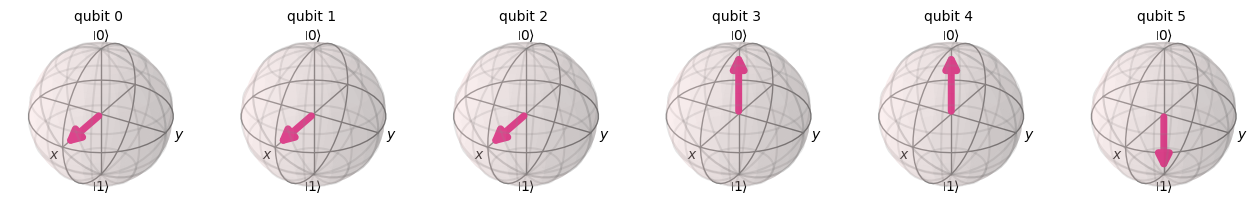

┌───┐
     phase_0: ┤ H ├
              ├───┤
     phase_1: ┤ H ├
              ├───┤
     phase_2: ┤ H ├
              └───┘
eigenstate_0: ─────
                   
eigenstate_1: ─────
              ┌───┐
eigenstate_2: ┤ X ├
              └───┘
    output: 3/═════

In [460]:
n = 3
m = 3
qr = QuantumRegister(n, name = 'phase')
qr2 = QuantumRegister(m, name = 'eigenstate')
cr = ClassicalRegister(n, 'output')
qc = QuantumCircuit(qr,qr2,cr)


# Apply H-Gates to counting qubits:
for qubit in range(n):
    qc.h(qubit)

# Prepare our eigenstate |psi>: state 198


eigstatelist = ['000', '001', '010', '011', '100', '101', '110', '111']
e = 1

####e = 2,4,6 is not working entirely. Possibly because the state ends with a zero??
eig = eigstatelist[e]

for ind, val in enumerate(eig):
    if(int(val)):
        qc.x(ind + n)

display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.draw()

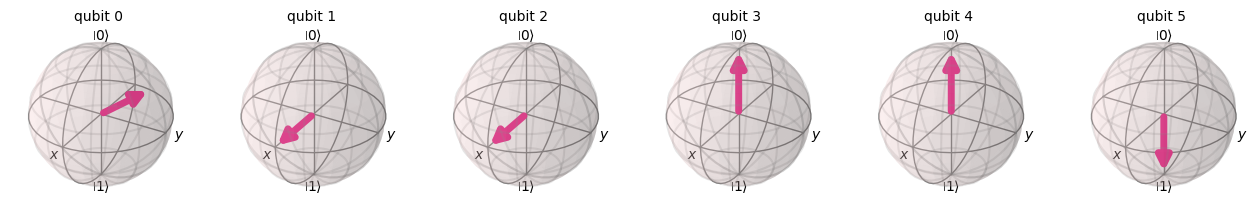

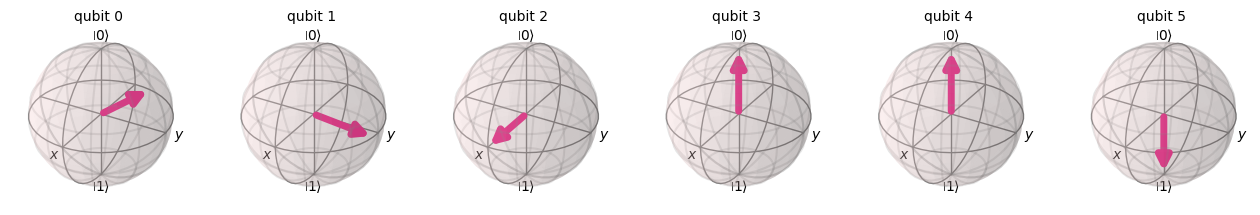

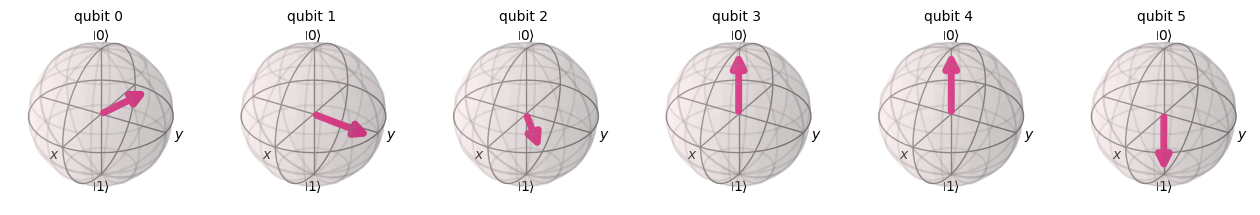

┌───┐┌─────┐┌─────┐┌─────┐┌─────┐                     ┌───────┐»
     phase_0: ┤ H ├┤0    ├┤0    ├┤0    ├┤0    ├─────────────────────┤0      ├»
              ├───┤│     ││     ││     ││     │┌─────┐┌─────┐       │       │»
     phase_1: ┤ H ├┤     ├┤     ├┤     ├┤     ├┤0    ├┤0    ├───────┤1 IQFT ├»
              ├───┤│     ││     ││     ││     ││     ││     │┌─────┐│       │»
     phase_2: ┤ H ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤0    ├┤2      ├»
              └───┘│  CU ││  CU ││  CU ││  CU ││     ││     ││     │└───────┘»
eigenstate_0: ─────┤1    ├┤1    ├┤1    ├┤1    ├┤1 CU ├┤1 CU ├┤1    ├─────────»
                   │     ││     ││     ││     ││     ││     ││  CU │         »
eigenstate_1: ─────┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├─────────»
              ┌───┐│     ││     ││     ││     ││     ││     ││     │         »
eigenstate_2: ┤ X ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├─────────»
              └───┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘         »
    output: 3/═══════════════════════════════════════════════════════════════»
                                                                             »
«              ┌─┐      
«     phase_0: ┤M├──────
«              └╥┘┌─┐   
«     phase_1: ─╫─┤M├───
«               ║ └╥┘┌─┐
«     phase_2: ─╫──╫─┤M├
«               ║  ║ └╥┘
«eigenstate_0: ─╫──╫──╫─
«               ║  ║  ║ 
«eigenstate_1: ─╫──╫──╫─
«               ║  ║  ║ 
«eigenstate_2: ─╫──╫──╫─
«               ║  ║  ║ 
«    output: 3/═╩══╩══╩═
«               0  1  2

In [461]:
eig_qubits = np.arange(0,m) + n

repetitions = int(2**(n-1))
for counting_qubit in range(n):
    applied_qubits = np.append([counting_qubit], [eig_qubits])
    for i in range(repetitions):
        qc.unitary(CUop, list(applied_qubits), label = "CU"); # This is CU
        
    repetitions /= 2
    repetitions = int(repetitions)
    display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

#display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.append(QFT(num_qubits = n, inverse = True, do_swaps=True), qr)
qc.measure(qr,cr)
qc.draw()

In [375]:
# eig_qubits = np.arange(0,m) + n

# repetitions = 1
# for counting_qubit in range(n):
#     applied_qubits = np.append([counting_qubit], [eig_qubits])
#     for i in range(repetitions):
#         qc.unitary(CUop, list(applied_qubits), label = "CU"); # This is CU
#     repetitions *= 2
    
# qc.append(QFT(num_qubits = n, inverse = True, do_swaps=False), qr)
# qc.measure(qr,cr)
# qc.draw()


In [376]:
Aer.backends()


[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [377]:
simulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc, simulator)  #### Doesnt like the inverse Quantum Fourier transform without decomposition
qc.draw()

┌───┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐»
     phase_0: ┤ H ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├»
              ├───┤│     ││     ││     ││     ││     ││     ││     ││     │»
     phase_1: ┤ H ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├»
              ├───┤│     ││     ││     ││     ││     ││     ││     ││     │»
     phase_2: ┤ H ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├»
              ├───┤│     ││     ││     ││     ││     ││     ││     ││     │»
     phase_3: ┤ H ├┤  CU ├┤  CU ├┤  CU ├┤  CU ├┤  CU ├┤  CU ├┤  CU ├┤  CU ├»
              ├───┤│     ││     ││     ││     ││     ││     ││     ││     │»
eigenstate_0: ┤ X ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├»
              └───┘│     ││     ││     ││     ││     ││     ││     ││     │»
eigenstate_1: ─────┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├»
                   │     ││     ││     ││     ││     ││     ││     ││     │»
eigenstate_2: ─────┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├»
                   └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘»
    output: 4/═════════════════════════════════════════════════════════════»
                                                                           »
«                                                                  ┌───┐»
«     phase_0: ──────────────────────────────────────────────────X─┤ H ├»
«              ┌─────┐┌─────┐┌─────┐┌─────┐                      │ └───┘»
«     phase_1: ┤0    ├┤0    ├┤0    ├┤0    ├─────────────────X────┼──────»
«              │     ││     ││     ││     │┌─────┐┌─────┐   │    │      »
«     phase_2: ┤     ├┤     ├┤     ├┤     ├┤0    ├┤0    ├───X────┼──────»
«              │     ││     ││     ││     ││     ││     │┌─────┐ │      »
«     phase_3: ┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤0    ├─X──────»
«              │  CU ││  CU ││  CU ││  CU ││     ││     ││     │        »
«eigenstate_0: ┤1    ├┤1    ├┤1    ├┤1    ├┤1 CU ├┤1 CU ├┤1    ├────────»
«              │     ││     ││     ││     ││     ││     ││  CU │        »
«eigenstate_1: ┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├────────»
«              │     ││     ││     ││     ││     ││     ││     │        »
«eigenstate_2: ┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├────────»
«              └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘        »
«    output: 4/═════════════════════════════════════════════════════════»
«                                                                       »
«                                                                          ┌─┐»
«     phase_0: ─■──────────────■───────────────────■───────────────────────┤M├»
«               │P(-π/2) ┌───┐ │                   │                       └╥┘»
«     phase_1: ─■────────┤ H ├─┼─────────■─────────┼──────────────■─────────╫─»
«                        └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │         ║ »
«     phase_2: ────────────────■─────────■─────────┼────────┤ H ├─┼─────────╫─»
«                                                  │P(-π/8) └───┘ │P(-π/4)  ║ »
«     phase_3: ────────────────────────────────────■──────────────■─────────╫─»
«                                                                           ║ »
«eigenstate_0: ─────────────────────────────────────────────────────────────╫─»
«                                                                           ║ »
«eigenstate_1: ─────────────────────────────────────────────────────────────╫─»
«                                                                           ║ »
«eigenstate_2: ─────────────────────────────────────────────────────────────╫─»
«                                                                           ║ »
«    output: 4/═════════════════════════════════════════════════════════════╩═»
«                                                                           0 »
«                                      
«     phase_0: ────────────────────────
«      

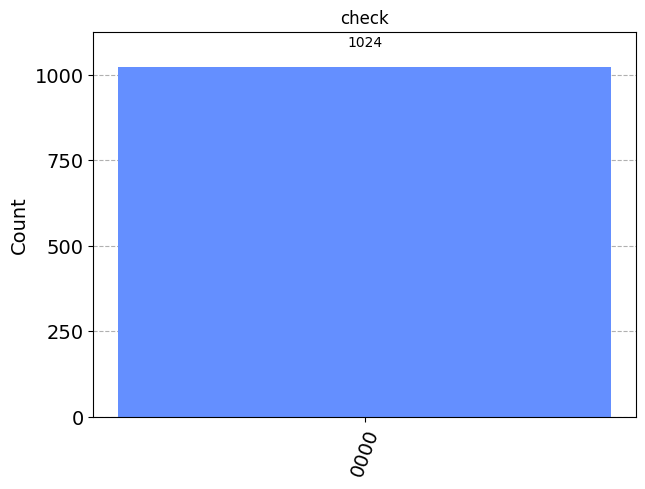

In [378]:
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='check')


In [379]:
max(counts, key=counts.get)


'0000'

In [380]:
def bitstring_converter(string):
    
    values = []
    value = 0
    j = 0
    for i, v in enumerate(string):
        
        if v == '1':
            value += 1/(2**(i+1-j))
        elif v == " ":
            values.append(value)
            value = 0
            j = i+1
            
        if i == len(string)-1:
            values.append(value)
    
    return values



In [381]:
answer = bitstring_converter(max(counts, key=counts.get))

print('predicted: {}'.format(answer))


predicted: [0]


In [382]:

print('actual: {}'.format(phases[e]))

actual: 0.4571428571428572


In [383]:
np.arange(0,1, 1/(2**(n)))


array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])

### Swapped the Ordering of Eigenstates and Phases

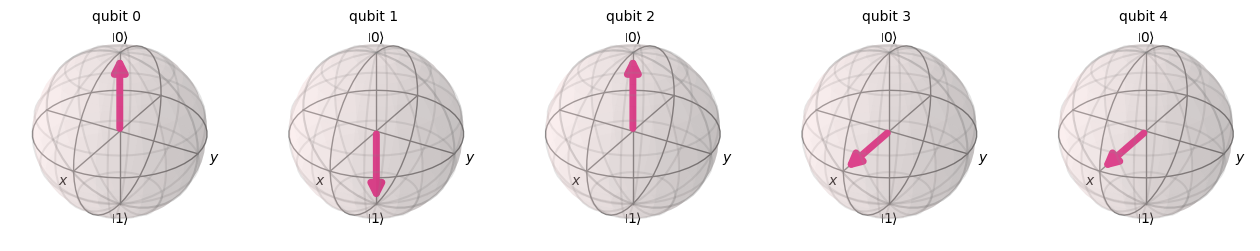

eigenstate_0: ─────
              ┌───┐
eigenstate_1: ┤ X ├
              └───┘
eigenstate_2: ─────
              ┌───┐
     phase_0: ┤ H ├
              ├───┤
     phase_1: ┤ H ├
              └───┘
    output: 2/═════

In [462]:
n = 2
m = 3
qr = QuantumRegister(n, name = 'phase')
qr2 = QuantumRegister(m, name = 'eigenstate')
cr = ClassicalRegister(n, 'output')
qc = QuantumCircuit(qr2,qr,cr)


# Apply H-Gates to counting qubits:
for qubit in range(n):
    qc.h(qubit + m)

# Prepare our eigenstate |psi>: state 198


eigstatelist = ['000', '001', '010', '011', '100', '101', '110', '111']
e = 2

####e = 2,4,6 is not working entirely. Possibly because the state ends with a zero??
eig = eigstatelist[e]

for ind, val in enumerate(eig):
    if(int(val)):
        qc.x(ind)

display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.draw()


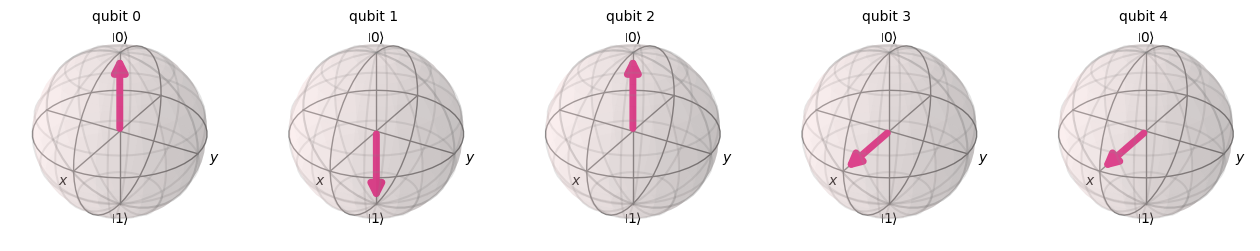

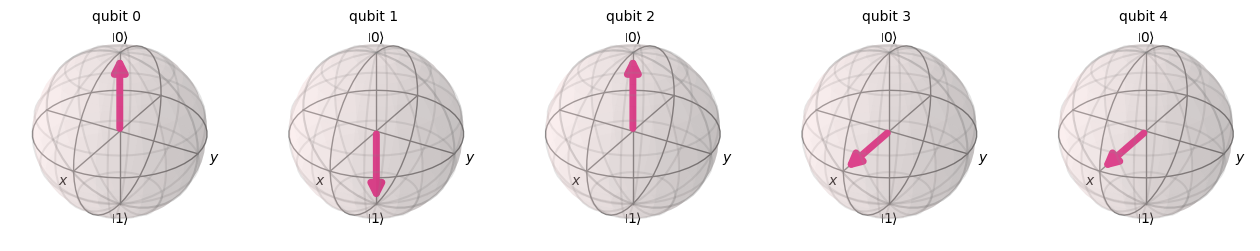

┌─────┐┌─────┐┌─────┐               
eigenstate_0: ─────┤1    ├┤1    ├┤1    ├───────────────
              ┌───┐│     ││     ││     │               
eigenstate_1: ┤ X ├┤2    ├┤2    ├┤2    ├───────────────
              └───┘│  CU ││  CU ││     │               
eigenstate_2: ─────┤3    ├┤3    ├┤3 CU ├───────────────
              ┌───┐│     ││     ││     │┌───────┐┌─┐   
     phase_0: ┤ H ├┤0    ├┤0    ├┤     ├┤0      ├┤M├───
              ├───┤└─────┘└─────┘│     ││  IQFT │└╥┘┌─┐
     phase_1: ┤ H ├──────────────┤0    ├┤1      ├─╫─┤M├
              └───┘              └─────┘└───────┘ ║ └╥┘
    output: 2/════════════════════════════════════╩══╩═
                                                  0  1

In [463]:
eig_qubits = np.arange(0,m)

repetitions = int(2**(n-1))
for counting_qubit in range(n):
    applied_qubits = np.append([counting_qubit+m], [eig_qubits])
    for i in range(repetitions):
        qc.unitary(CUop, list(applied_qubits), label = "CU"); # This is CU
        
    repetitions /= 2
    repetitions = int(repetitions)
    display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

#display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.append(QFT(num_qubits = n, inverse = True, do_swaps=True), qr)
qc.measure(qr,cr)
qc.draw()


In [449]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [450]:
simulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc, simulator)  #### Doesnt like the inverse Quantum Fourier transform without decomposition
qc.draw()

┌───┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐»
eigenstate_0: ┤ X ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├»
              ├───┤│     ││     ││     ││     ││     ││     ││     ││     │»
eigenstate_1: ┤ X ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├»
              └───┘│  CU ││  CU ││  CU ││  CU ││  CU ││  CU ││  CU ││  CU │»
eigenstate_2: ─────┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├»
              ┌───┐│     ││     ││     ││     ││     ││     ││     ││     │»
     phase_0: ┤ H ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├»
              ├───┤└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘»
     phase_1: ┤ H ├────────────────────────────────────────────────────────»
              ├───┤                                                        »
     phase_2: ┤ H ├────────────────────────────────────────────────────────»
              ├───┤                                                        »
     phase_3: ┤ H ├────────────────────────────────────────────────────────»
              └───┘                                                        »
    output: 4/═════════════════════════════════════════════════════════════»
                                                                           »
«              ┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐   ┌─────┐        »
«eigenstate_0: ┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├───┤1    ├────────»
«              │     ││     ││     ││     ││     ││     │   │     │        »
«eigenstate_1: ┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├───┤2    ├────────»
«              │     ││     ││     ││     ││     ││     │   │     │        »
«eigenstate_2: ┤3 CU ├┤3 CU ├┤3 CU ├┤3 CU ├┤3    ├┤3    ├───┤3    ├────────»
«              │     ││     ││     ││     ││  CU ││  CU │   │     │   ┌───┐»
«     phase_0: ┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├───┤  CU ├─X─┤ H ├»
«              │     ││     ││     ││     ││     ││     │   │     │ │ └───┘»
«     phase_1: ┤0    ├┤0    ├┤0    ├┤0    ├┤     ├┤     ├─X─┤     ├─┼──────»
«              └─────┘└─────┘└─────┘└─────┘│     ││     │ │ │     │ │      »
«     phase_2: ────────────────────────────┤0    ├┤0    ├─X─┤     ├─┼──────»
«                                          └─────┘└─────┘   │     │ │      »
«     phase_3: ─────────────────────────────────────────────┤0    ├─X──────»
«                                                           └─────┘        »
«    output: 4/════════════════════════════════════════════════════════════»
«                                                                          »
«                                                                             »
«eigenstate_0: ───────────────────────────────────────────────────────────────»
«                                                                             »
«eigenstate_1: ───────────────────────────────────────────────────────────────»
«                                                                             »
«eigenstate_2: ───────────────────────────────────────────────────────────────»
«                                                                          ┌─┐»
«     phase_0: ─■──────────────■───────────────────■───────────────────────┤M├»
«               │P(-π/2) ┌───┐ │                   │                       └╥┘»
«     phase_1: ─■────────┤ H ├─┼─────────■─────────┼──────────────■─────────╫─»
«                        └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │         ║ »
«     phase_2: ────────────────■─────────■─────────┼────────┤ H ├─┼─────────╫─»
«                                                  │P(-π/8) └───┘ │P(-π/4)  ║ »
«     phase_3: ────────────────────────────────────■──────────────■─────────╫─»
«                                                                           ║ »
«    output: 4/═════════════════════════════════════════════════════════════╩═»
«                                                                           0 »
«                                   

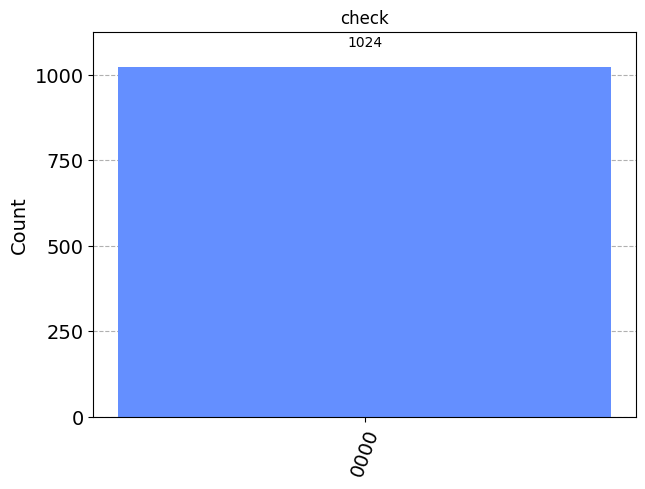

In [451]:
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='check')

In [452]:
answer = bitstring_converter(max(counts, key=counts.get))
print('predicted: {}'.format(answer))
print('actual: {}'.format(phases[e]))
print('actual phases:')
print(phases)
print('possible estimations:')
print(np.arange(0,1, 1/(2**(n))))

predicted: [0]
actual: 0.6857142857142857
actual phases:
[0.         0.11428571 0.22857143 0.34285714 0.45714286 0.57142857
 0.68571429 0.8       ]
possible estimations:
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375]




## Attempt 3


In [613]:
# gives exact results
phases = np.linspace(0,0.875,8)

# checking approximation case
phases = np.linspace(0,0.8,8)

for index, value in enumerate(phases):
    variable_name = "U{}".format(index)
    globals()[variable_name] = np.exp(1j * phases[index] * 2 * np.pi)
    
U = np.array([globals()["U{}".format(i)] for i in range(len(phases))])

# this was easier
U = np.exp(phases * 2 * np.pi * 1j)
Ugate = qi.Operator(np.diag(U)).to_instruction()
Ugate.label = "CU"
CUgate = Ugate.control() 


print(phases)
print(np.angle(U)/2/np.pi)

[0.         0.11428571 0.22857143 0.34285714 0.45714286 0.57142857
 0.68571429 0.8       ]
[ 0.          0.11428571  0.22857143  0.34285714  0.45714286 -0.42857143
 -0.31428571 -0.2       ]


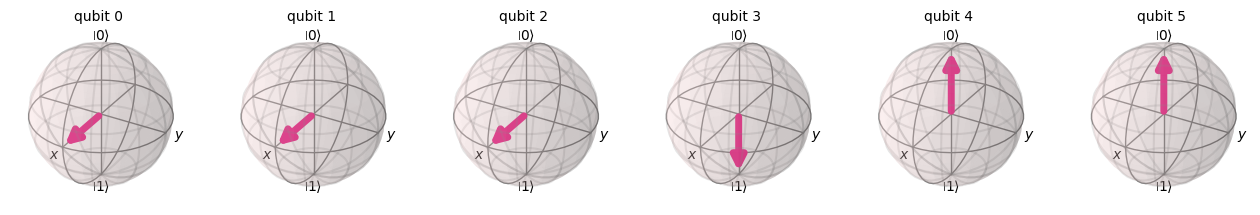

┌───┐
     phase_0: ┤ H ├
              ├───┤
     phase_1: ┤ H ├
              ├───┤
     phase_2: ┤ H ├
              ├───┤
eigenstate_0: ┤ X ├
              └───┘
eigenstate_1: ─────
                   
eigenstate_2: ─────
                   
    output: 3/═════

In [621]:
n = 3
m = 3
qr = QuantumRegister(n, name = 'phase')
qr2 = QuantumRegister(m, name = 'eigenstate')
cr = ClassicalRegister(n, 'output')
qc = QuantumCircuit(qr,qr2,cr)


# Apply H-Gates to counting qubits:
for qubit in range(n):
    qc.h(qubit)

# Prepare our eigenstate |psi>: state 198


eigstatelist = ['000', '001', '010', '011', '100', '101', '110', '111']
e = 1

####e = 2,4,6 is not working entirely. Possibly because the state ends with a zero??
eig = eigstatelist[e][::-1] # reversing

for ind, val in enumerate(eig):
    if(int(val)):
        qc.x(ind + n)

display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.draw()

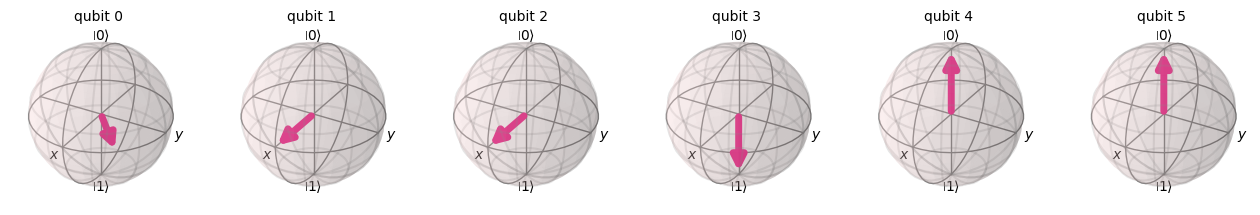

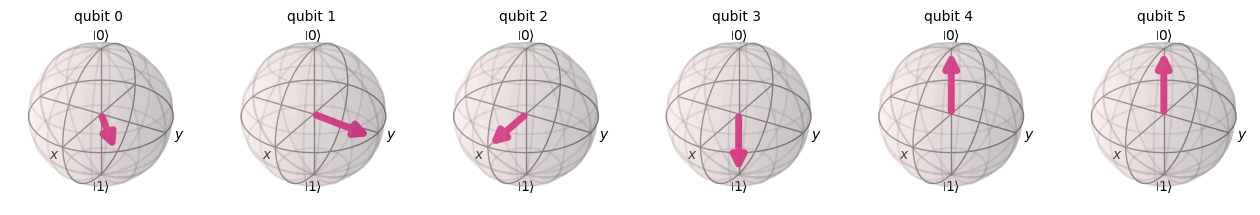

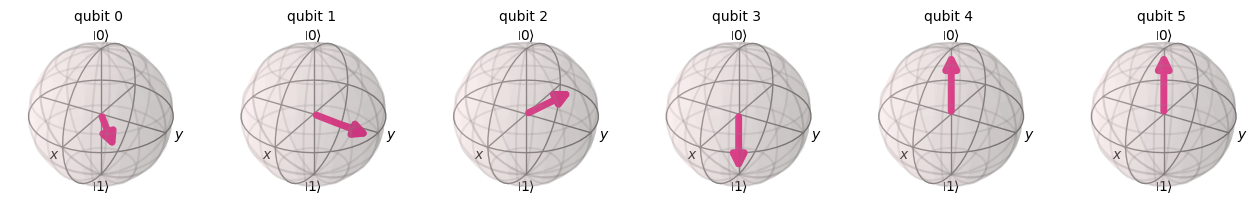

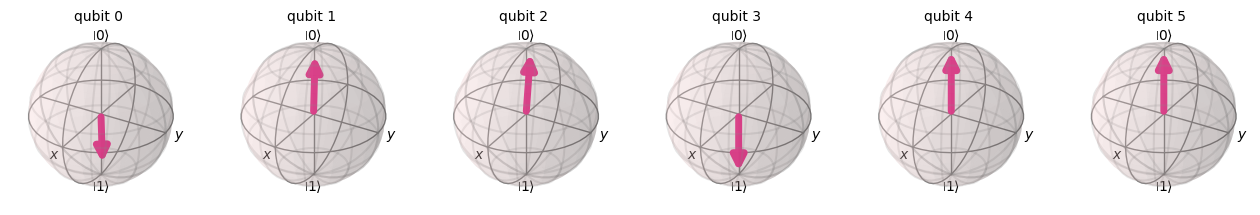

┌───┐                                                 ┌───────┐»
     phase_0: ┤ H ├───■─────────────────────────────────────────────┤0      ├»
              ├───┤   │                                             │       │»
     phase_1: ┤ H ├───┼──────■──────■───────────────────────────────┤1 IQFT ├»
              ├───┤   │      │      │                               │       │»
     phase_2: ┤ H ├───┼──────┼──────┼──────■──────■──────■──────■───┤2      ├»
              ├───┤┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐└───────┘»
eigenstate_0: ┤ X ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├─────────»
              └───┘│     ││     ││     ││     ││     ││     ││     │         »
eigenstate_1: ─────┤1 CU ├┤1 CU ├┤1 CU ├┤1 CU ├┤1 CU ├┤1 CU ├┤1 CU ├─────────»
                   │     ││     ││     ││     ││     ││     ││     │         »
eigenstate_2: ─────┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├─────────»
                   └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘         »
    output: 3/═══════════════════════════════════════════════════════════════»
                                                                             »
«              ┌─┐      
«     phase_0: ┤M├──────
«              └╥┘┌─┐   
«     phase_1: ─╫─┤M├───
«               ║ └╥┘┌─┐
«     phase_2: ─╫──╫─┤M├
«               ║  ║ └╥┘
«eigenstate_0: ─╫──╫──╫─
«               ║  ║  ║ 
«eigenstate_1: ─╫──╫──╫─
«               ║  ║  ║ 
«eigenstate_2: ─╫──╫──╫─
«               ║  ║  ║ 
«    output: 3/═╩══╩══╩═
«               0  1  2

In [622]:
eig_qubits = np.arange(0,m) + n

repetitions = 1

# for reverse
# repetitions = int(2**(n-1))
repetitions
for counting_qubit in range(n):
    applied_qubits = np.append([counting_qubit], [eig_qubits])
    for i in range(repetitions):
        qc.append(CUgate, list(applied_qubits)); # This is CU
    
    repetitions *= 2
    #for reverse
    #repetitions /= 2
    #repetitions = int(repetitions)
    
    display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

#display(plot_bloch_multivector(Statevector.from_instruction(qc).data))


qc.append(QFT(num_qubits = n, inverse = True, do_swaps=True), qr)
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

qc.measure(qr,cr)
qc.draw()

In [623]:
simulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc, simulator)  #### Doesnt like the inverse Quantum Fourier transform without decomposition
#qc.draw()

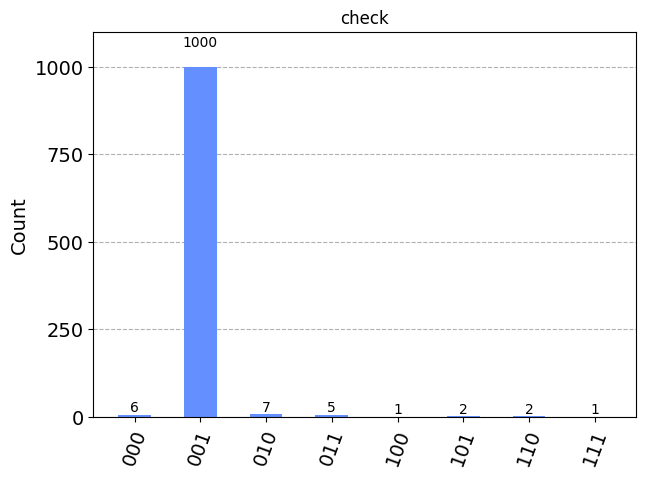

In [624]:
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='check')

In [625]:
answer = bitstring_converter(max(counts, key=counts.get))
print('predicted: {}'.format(answer))
print('actual: {}'.format(phases[e]))

predicted: [0.125]
actual: 0.1142857142857143


In [626]:
print('actual phases:')
print(phases)
print('possible estimations:')
print(np.arange(0,1, 1/(2**(n))))

actual phases:
[0.         0.11428571 0.22857143 0.34285714 0.45714286 0.57142857
 0.68571429 0.8       ]
possible estimations:
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
